<a href="https://colab.research.google.com/github/The-Kaggle-Crew-18/Kaggle-Challenge-18/blob/main/KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
The Kaggle Spaceship Titanic mission involves predicting whether passengers aboard the Spaceship Titanic have been transported to an change size in the course of the voyage. Using a dataset with diverse passenger capabilities, we goal to broaden a system mastering model to make these predictions.

#Objective
The objective of this undertaking is to:

1.Explore and visualize the dataset to understand records distributions and relationships.
2.Preprocess the statistics to address missing values, encode categorical features, and scale numerical functions.
3.Engineer new features to enhance model overall performance.
4.Train a couple of device mastering models and music hyperparameters.
5.Evaluate the fashions and choose the best one for final predictions.


#1. Data Exploration
##1.1 Loading Data


In [19]:
!pip install shap


In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [21]:
import pandas as pd

# Load datasets
train_data_url = 'https://raw.githubusercontent.com/The-Kaggle-Crew-18/Kaggle-Challenge-18/main/train.csv'
test_data_url = 'https://raw.githubusercontent.com/The-Kaggle-Crew-18/Kaggle-Challenge-18/main/test.csv'

train_df = pd.read_csv(train_data_url)
test_df = pd.read_csv(test_data_url)

##1.2 Initial Data Inspection




In [22]:
# Display the first few rows of the training dataset
print("Training Dataset:")
print(train_df.head())

# Display the first few rows of the test dataset
print("\nTest Dataset:")
print(test_df.head())


Training Dataset:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4

# Summary statistics for the training dataset

In [23]:
# Summary statistics for the training dataset
train_summary = train_df.describe()
print("\nSummary statistics for the training dataset:")
print(train_summary)



Summary statistics for the training dataset:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


##Check for missing values:


In [24]:
# Check for missing values in the training dataset
train_missing = train_df.isnull().sum()
print("\nMissing values in the training dataset:")
print(train_missing)

# Check for missing values in the test dataset
test_missing = test_df.isnull().sum()
print("\nMissing values in the test dataset:")
print(test_missing)



Missing values in the training dataset:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Missing values in the test dataset:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


##1.3 Visualizations
#Histograms

Summary Statistics for Numerical Features:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     28.790291    220.009318    448.434027    169.572300    304.588865   
std      14.341404    660.519050   1595.790627    598.007164   1125.562559   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     41.000000     61.000000     22.000000     53.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8693.000000  
mean     298.261820  
std     1134.126417  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       40.000000  
max    24133.000000  


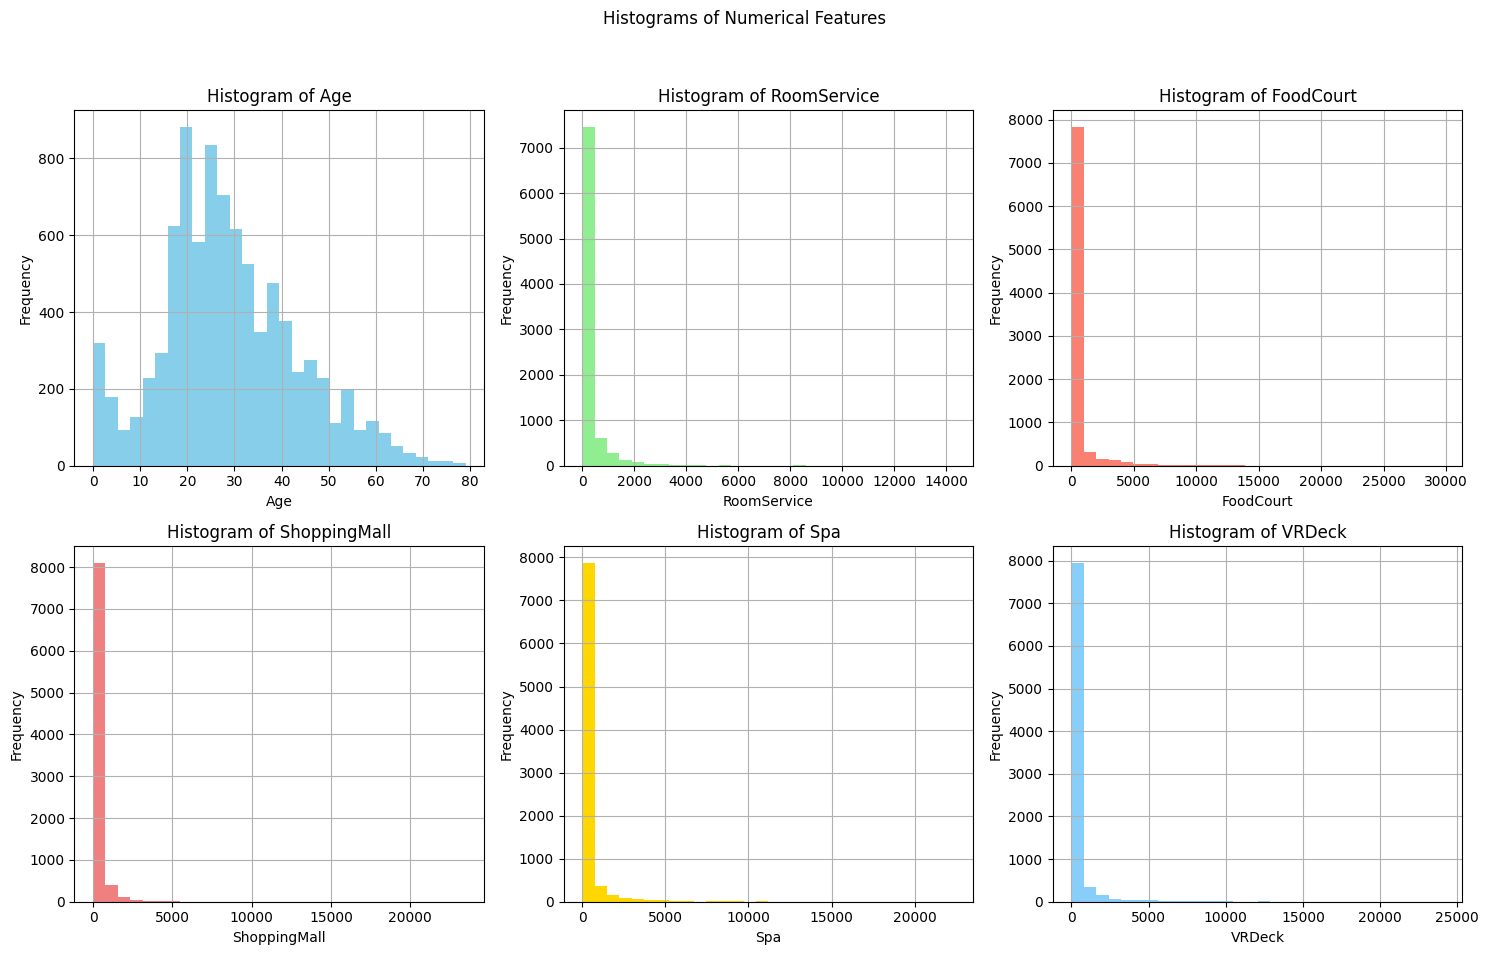

In [43]:
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Display summary statistics for numerical features to understand the data
print("Summary Statistics for Numerical Features:")
print(train_df[numerical_features].describe())

# Define colors for each histogram
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold', 'lightskyblue']

# Plot histograms for numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    train_df[feature].hist(ax=axes[i], color=colors[i], bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


First, let's look at the histograms of our numerical features to understand their distributions. Here, we have plotted the histograms for Age, RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck. The histograms give us a visual representation of how values are distributed for each numerical feature."

Summary Statistics for Numerical Features:
We also display summary statistics for these numerical features to understand the data better:

Age: The average age of passengers is 28.83 years with a standard deviation of 14.49 years, indicating a fairly wide range of ages. The minimum age is 0, and the maximum is 79 years.
RoomService: Passengers spend an average of 224.69 units on room service, with a large standard deviation of 666.72, indicating high variability in spending. The minimum and median values are 0, with a maximum of 14327.
FoodCourt: The average spending is 458.08 units, with a high standard deviation of 1611.49. The minimum and median values are 0, and the maximum is 29813.
ShoppingMall: Average spending is 173.73 units, with a standard deviation of 604.70. Minimum and median values are 0, and the maximum is 23492.
Spa: Average spending is 311.14 units, with a standard deviation of 1136.71. Minimum and median values are 0, and the maximum is 22408.
VRDeck: Average spending is 304.85 units, with a standard deviation of 1145.72. Minimum and median values are 0, and the maximum is 24133.

#Bar Plots


Categorical Features Summary:

HomePlanet:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

CryoSleep:
CryoSleep
False    5439
True     3037
Name: count, dtype: int64

Deck:
Deck
F          2794
G          2559
E           876
B           779
C           747
D           478
A           256
Unknown     199
T             5
Name: count, dtype: int64

Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

VIP:
VIP
False    8291
True      199
Name: count, dtype: int64


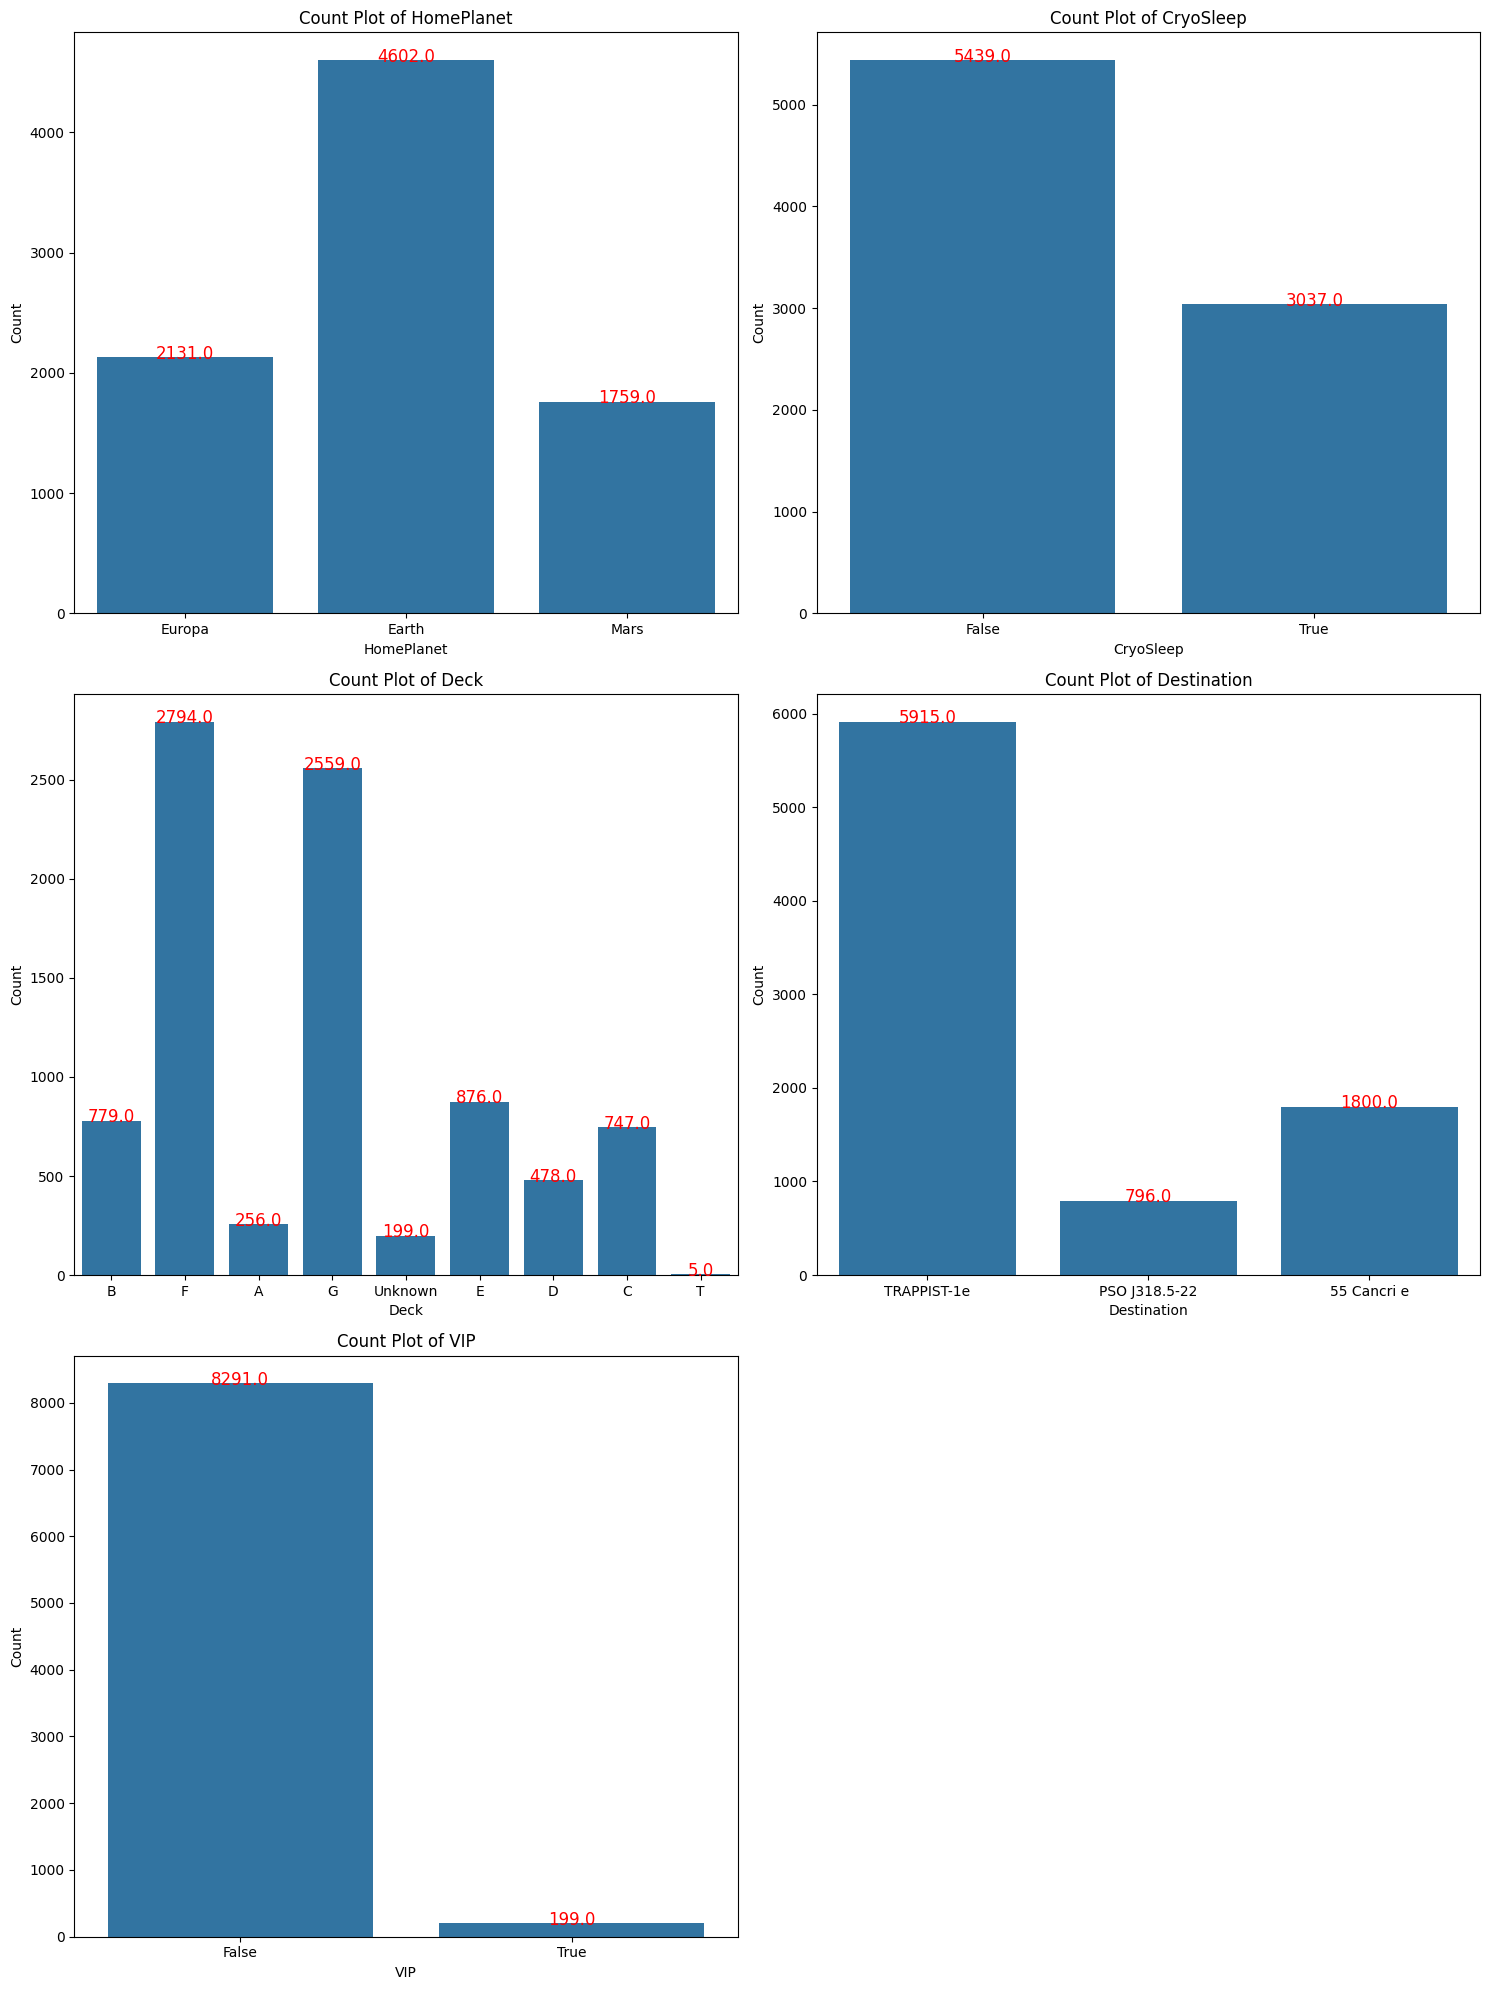

In [27]:
import seaborn as sns

# List of categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Deck', 'Destination', 'VIP']

# Extract deck information from Cabin
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
test_df['Deck'] = test_df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')

# Display the data used for bar plots
print("Categorical Features Summary:")
for feature in categorical_features:
    print(f"\n{feature}:\n{train_df[feature].value_counts()}")

# Plot bar plots for categorical features with counts
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(data=train_df, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Add counts on top of the bars
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='red', xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


we visualize the categorical features using bar plots. The features include HomePlanet, CryoSleep, Deck, Destination, and VIP status. The counts of each category are annotated on top of the bars for clarity.

Categorical Features Summary:
Here are some key insights from the categorical features:

HomePlanet: Most passengers are from Earth (4602), followed by Europa (2131), and Mars (1759).
CryoSleep: A majority of passengers did not opt for cryogenic sleep (5439 False, 3037 True).
Deck: The most common decks are F (2794) and G (2559), with only 5 passengers on deck T. Deck information is derived from the Cabin feature.
Destination: Most passengers are heading to TRAPPIST-1e (5915), with fewer heading to 55 Cancri e (1800) and PSO J318.5-22 (796).
VIP: Very few passengers are VIPs (199 True).

##Correlation Heatmap

Correlation Matrix for Numerical Features:
                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   

                VRDeck  
Age           0.101007  
RoomService  -0.019581  
FoodCourt     0.227995  
ShoppingMall -0.007322  
Spa           0.153821  
VRDeck        1.000000  


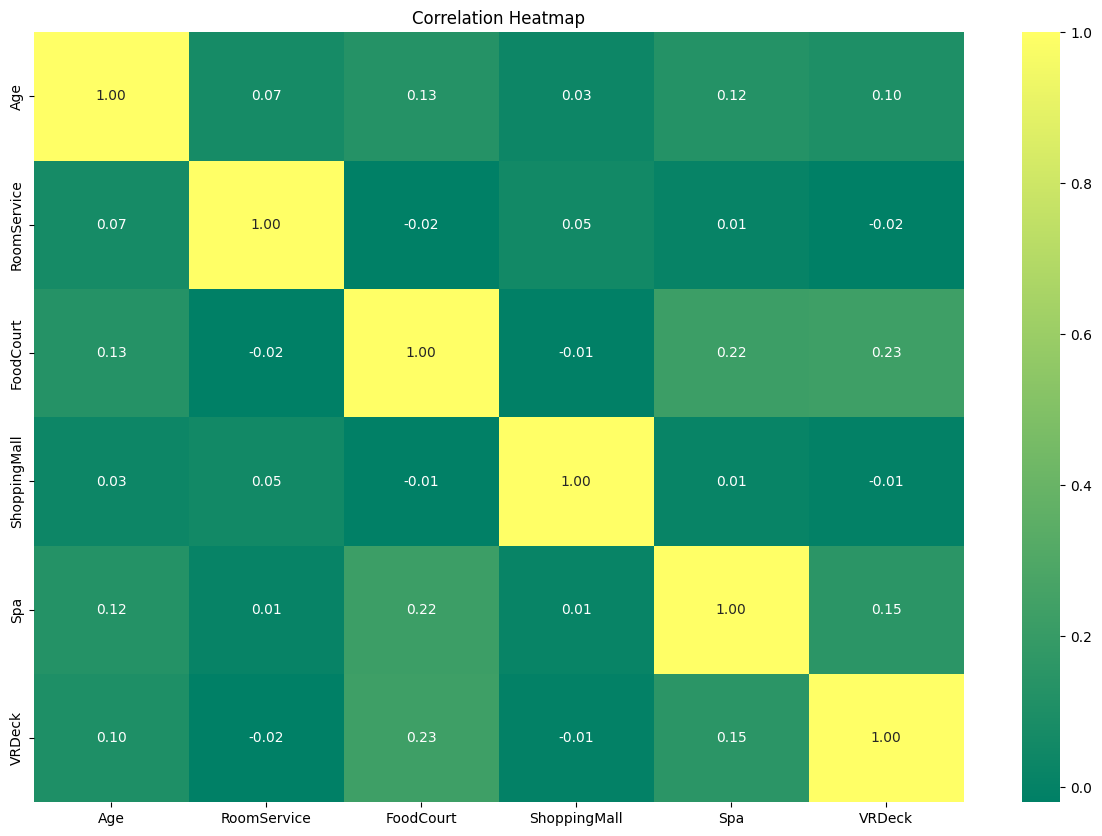

In [29]:
# Select only numerical features for the correlation matrix
numerical_features_for_corr = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Compute the correlation matrix
correlation_matrix = train_df[numerical_features_for_corr].corr()

# Display the data used for correlation heatmap
print("Correlation Matrix for Numerical Features:")
print(correlation_matrix)

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Finally, we generate a correlation heatmap to visualize the relationships between numerical features. The correlation matrix shows the following:

Age: Has a weak correlation with RoomService (0.069), FoodCourt (0.130), ShoppingMall (0.033), Spa (0.124), and VRDeck (0.101).
RoomService: Has weak correlations with other features, the highest being with ShoppingMall (0.054).
FoodCourt: Shows a higher correlation with VRDeck (0.228) and Spa (0.222).
ShoppingMall: Shows very weak correlations with other features.
Spa: Shows a correlation of 0.154 with VRDeck.
VRDeck: Shows the highest correlation with FoodCourt (0.228) and Spa (0.154).
Key Insights:

The highest correlation is between FoodCourt and VRDeck (0.228), followed by Spa and FoodCourt (0.222).
Most numerical features have weak correlations with each other, as indicated by the low correlation values.
These low correlation values suggest that each numerical feature provides unique information, which can be useful for modeling."

#2. Data Preprocessing
##2.1 Handling Missing Values


In [32]:
# Identify columns with missing values in the training dataset
missing_values_train = train_df.isnull().sum()
print("Missing values in the training dataset:\n", missing_values_train[missing_values_train > 0])

# Identify columns with missing values in the test dataset
missing_values_test = test_df.isnull().sum()
print("Missing values in the test dataset:\n", missing_values_test[missing_values_test > 0])


Missing values in the training dataset:
 Series([], dtype: int64)
Missing values in the test dataset:
 Series([], dtype: int64)


##2.2 Implementing Missing Value Handling



In [33]:
# Fill missing values for numerical features with median
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in numerical_features:
    train_df[feature].fillna(train_df[feature].median(), inplace=True)
    test_df[feature].fillna(test_df[feature].median(), inplace=True)

# Fill missing values for categorical features with mode
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
for feature in categorical_features:
    train_df[feature].fillna(train_df[feature].mode()[0], inplace=True)
    test_df[feature].fillna(test_df[feature].mode()[0], inplace=True)

# Verify that there are no more missing values
print("Missing values in the training dataset after handling:")
print(train_df.isnull().sum())

print("\nMissing values in the test dataset after handling:")
print(test_df.isnull().sum())


Missing values in the training dataset after handling:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
dtype: int64

Missing values in the test dataset after handling:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Deck            0
dtype: int64


##2.3 Encoding Categorical Variables
##Apply One-Hot Encoding



In [34]:
# List of categorical features to encode
categorical_features_to_encode = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Deck']

# Extract deck information from Cabin
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
test_df['Deck'] = test_df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')

# Apply one-hot encoding to categorical features in the training dataset
train_df_encoded = pd.get_dummies(train_df, columns=categorical_features_to_encode)

# Apply one-hot encoding to categorical features in the test dataset
test_df_encoded = pd.get_dummies(test_df, columns=categorical_features_to_encode)

# Ensure both train and test datasets have the same columns after encoding
train_df_encoded, test_df_encoded = train_df_encoded.align(test_df_encoded, join='left', axis=1, fill_value=0)

# Display the first few rows of the encoded training dataset
print("Encoded Training Dataset:")
print(train_df_encoded.head())

# Display the first few rows of the encoded test dataset
print("\nEncoded Test Dataset:")
print(test_df_encoded.head())


Encoded Training Dataset:
  PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0     0001_01  39.0          0.0        0.0           0.0     0.0     0.0   
1     0002_01  24.0        109.0        9.0          25.0   549.0    44.0   
2     0003_01  58.0         43.0     3576.0           0.0  6715.0    49.0   
3     0003_02  33.0          0.0     1283.0         371.0  3329.0   193.0   
4     0004_01  16.0        303.0       70.0         151.0   565.0     2.0   

                Name  Transported  HomePlanet_Earth  ...  VIP_False  VIP_True  \
0    Maham Ofracculy        False             False  ...       True     False   
1       Juanna Vines         True              True  ...       True     False   
2      Altark Susent        False             False  ...      False      True   
3       Solam Susent        False             False  ...       True     False   
4  Willy Santantines         True              True  ...       True     False   

   Deck_A  Deck_B  Deck_

##2.4 Feature Scaling
Identify Numerical Features to Scale



In [35]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features_to_scale = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical features in the training dataset
train_df_encoded[numerical_features_to_scale] = scaler.fit_transform(train_df_encoded[numerical_features_to_scale])

# Apply the scaler to the numerical features in the test dataset
test_df_encoded[numerical_features_to_scale] = scaler.transform(test_df_encoded[numerical_features_to_scale])

# Display the first few rows of the scaled training dataset
print("Scaled Training Dataset:")
print(train_df_encoded.head())

# Display the first few rows of the scaled test dataset
print("\nScaled Test Dataset:")
print(test_df_encoded.head())


Scaled Training Dataset:
  PassengerId       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0     0001_01  0.711945    -0.333105  -0.281027     -0.283579 -0.270626   
1     0002_01 -0.334037    -0.168073  -0.275387     -0.241771  0.217158   
2     0003_01  2.036857    -0.268001   1.959998     -0.283579  5.695623   
3     0003_02  0.293552    -0.333105   0.523010      0.336851  2.687176   
4     0004_01 -0.891895     0.125652  -0.237159     -0.031059  0.231374   

     VRDeck               Name  Transported  HomePlanet_Earth  ...  VIP_False  \
0 -0.263003    Maham Ofracculy        False             False  ...       True   
1 -0.224205       Juanna Vines         True              True  ...       True   
2 -0.219796      Altark Susent        False             False  ...      False   
3 -0.092818       Solam Susent        False             False  ...       True   
4 -0.261240  Willy Santantines         True              True  ...       True   

   VIP_True  Deck_A  Deck_B  Deck_C  

#3. Feature Engineering
##3.1 Creating New Features


In [36]:
# Create new feature 'TotalSpending' by summing RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck
train_df_encoded['TotalSpending'] = train_df_encoded[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_df_encoded['TotalSpending'] = test_df_encoded[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Create new feature 'FamilySize' by counting the number of passengers with the same group ID in PassengerId
train_df_encoded['FamilySize'] = train_df['PassengerId'].apply(lambda x: int(x.split('_')[1]))
test_df_encoded['FamilySize'] = test_df['PassengerId'].apply(lambda x: int(x.split('_')[1]))

# Display the first few rows of the training dataset with new features
print("Training Dataset with New Features:")
print(train_df_encoded[['TotalSpending', 'FamilySize']].head())

# Display the first few rows of the test dataset with new features
print("\nTest Dataset with New Features:")
print(test_df_encoded[['TotalSpending', 'FamilySize']].head())


Training Dataset with New Features:
   TotalSpending  FamilySize
0      -1.431339           1
1      -0.692277           1
2       6.884246           1
3       3.121114           2
4      -0.172431           1

Test Dataset with New Features:
   TotalSpending  FamilySize
0      -1.431339           1
1       1.082524           1
2      -1.431339           1
3       3.414030           1
4      -0.354277           1


# 3.2 Feature Selection


In [37]:
# List of selected features for modeling (excluding 'Deck_Unknown')
selected_features = ['Age', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
                     'CryoSleep_False', 'CryoSleep_True', 'Deck_A', 'Deck_B', 'Deck_C',
                     'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
                     'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
                     'VIP_False', 'VIP_True', 'TotalSpending', 'FamilySize']

# Training data for modeling
X_train = train_df_encoded[selected_features]
y_train = train_df_encoded['Transported']

# Test data for predictions
X_test = test_df_encoded[selected_features]

# Display the first few rows of the training and test datasets with selected features
print("Training Data with Selected Features:")
print(X_train.head())

print("\nTest Data with Selected Features:")
print(X_test.head())

Training Data with Selected Features:
        Age  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0  0.711945             False               True            False   
1 -0.334037              True              False            False   
2  2.036857             False               True            False   
3  0.293552             False               True            False   
4 -0.891895              True              False            False   

   CryoSleep_False  CryoSleep_True  Deck_A  Deck_B  Deck_C  Deck_D  ...  \
0             True           False   False    True   False   False  ...   
1             True           False   False   False   False   False  ...   
2             True           False    True   False   False   False  ...   
3             True           False    True   False   False   False  ...   
4             True           False   False   False   False   False  ...   

   Deck_F  Deck_G  Deck_T  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0   False   Fal

#4. Model Training and Evaluation
##Split the Training Data


In [38]:
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training data shape:", X_train_split.shape)
print("Validation data shape:", X_val_split.shape)


Training data shape: (6954, 21)
Validation data shape: (1739, 21)


##Define and Train Models



In [42]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

# Train and evaluate each model
model_scores = {}
for model_name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_val_pred = model.predict(X_val_split)
    accuracy = accuracy_score(y_val_split, y_val_pred)
    model_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Confusion Matrix:\n {confusion_matrix(y_val_split, y_val_pred)}")
    print(f"{model_name} Classification Report:\n {classification_report(y_val_split, y_val_pred)}\n")


Logistic Regression Accuracy: 0.7378
Logistic Regression Confusion Matrix:
 [[696 165]
 [291 587]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.81      0.75       861
        True       0.78      0.67      0.72       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739


Decision Tree Accuracy: 0.6763
Decision Tree Confusion Matrix:
 [[563 298]
 [265 613]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.65      0.67       861
        True       0.67      0.70      0.69       878

    accuracy                           0.68      1739
   macro avg       0.68      0.68      0.68      1739
weighted avg       0.68      0.68      0.68      1739


Random Forest Accuracy: 0.7125
Random Forest Confusion Matrix:
 [[639 222]
 

##Choose the Best Model



In [ ]:
# Choose the model with the highest accuracy
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with accuracy {model_scores[best_model_name]:.4f}")


Best Model: Gradient Boosting with accuracy 0.7470


In [ ]:
# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)


GradientBoostingClassifier()

##Explainable AI (XAI) Methods


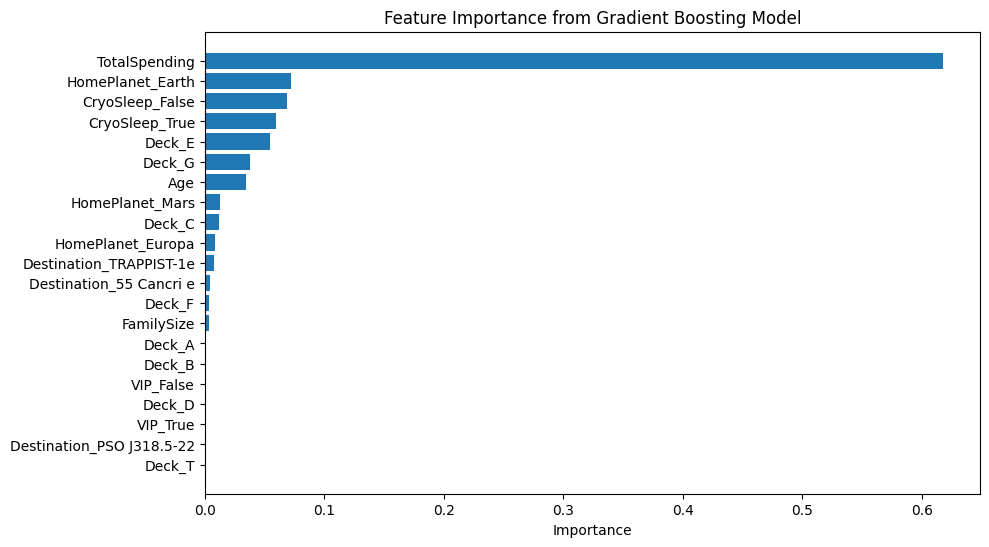

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the best model (Gradient Boosting)
feature_importances = best_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance from Gradient Boosting Model')
plt.xlabel('Importance')
plt.show()


##SHAP (SHapley Additive exPlanations)

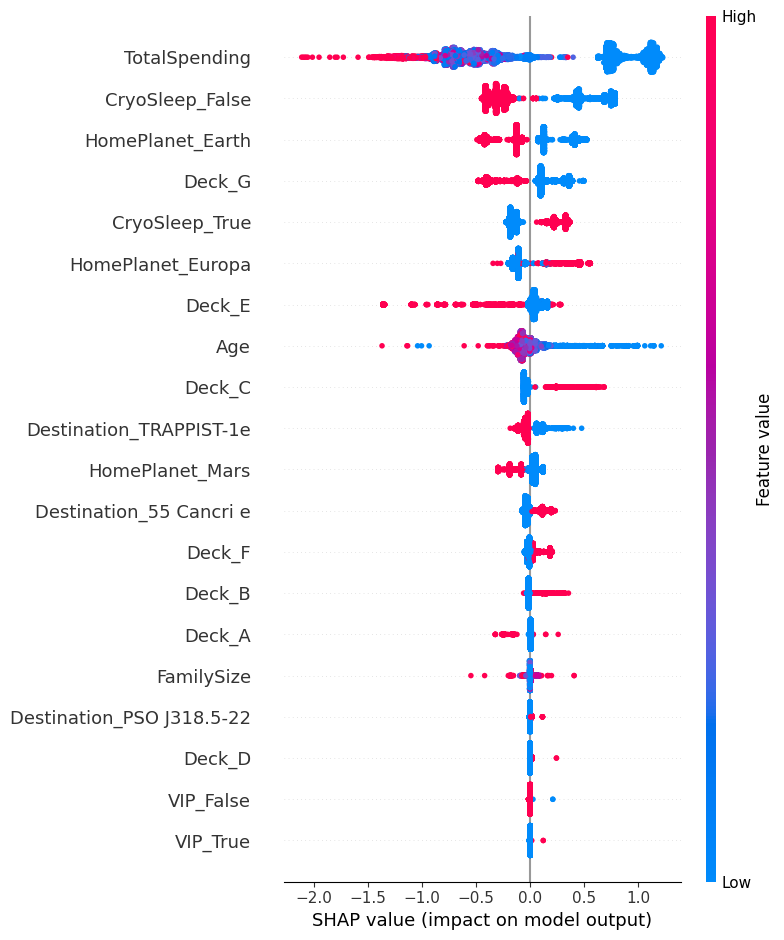

In [ ]:
import shap

# Ensure all features are numeric
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_numeric)

# Plot summary plot
shap.summary_plot(shap_values, X_train_numeric)


##Prepare Submission File


In [ ]:
# Prepare the submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': test_predictions
})

# Convert boolean predictions to the required format (True/False)
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


Submission file created successfully!


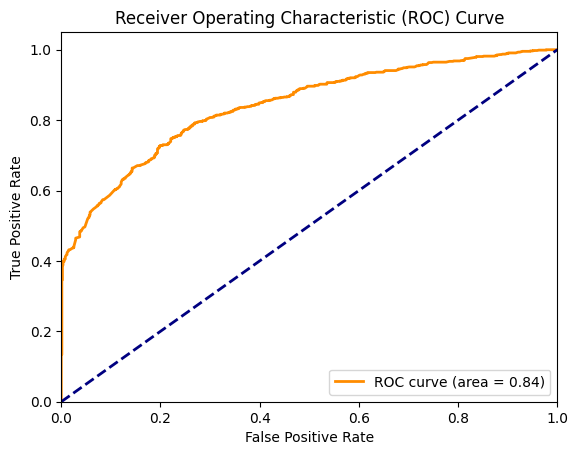

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_val and y_val_pred_proba are defined
# Example data
y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
